In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import isdir
from os import listdir, mkdir
from matplotlib.backends.backend_pdf import PdfPages

rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def Plot_Abundances(df, title):
    counts = df.iloc[:, df.columns.get_level_values(1)=='Num_Reads'].sum(axis = 1).tolist()
    top_100 = np.argsort(counts)[-100:]
    df_Filtered = df.iloc[top_100]
    df_Filtered = df_Filtered.set_index([('Sample','Stat')])
    df_Filtered = df_Filtered.iloc[:,df_Filtered.columns.get_level_values(1)=='Avg_Depth_Coverage']
    df_Filtered.columns = df_Filtered.columns.droplevel(1)
    columns = []
    for c in df_Filtered.columns.tolist():
        c = c.replace("Hotspr20Sample","").replace("Hotspr2Sample","").replace("HotsprSample","")
        c = c.replace("HotsprSamp","").replace("HotsprSamp1t","").replace("Hotspr","")
        columns.append(c)
    df_Filtered.columns = columns

    fig,ax = plt.subplots(1,1, figsize = (16,10))
    df_Filtered.T.plot(legend = False, ax = ax)
    ax.set_xticks(range(0, len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yscale('log')
    ax.set_title(title)
    ax.set_ylabel('Avg. Depth')
    fig.tight_layout()
    return fig

In [2]:
outdir = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Single_Cell_Analyses_All_Alleles_Index/'
par_dir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/Filtered_Alignments/'
if not isdir(outdir):
    mkdir(outdir)


In [3]:
plt.rcParams.update(rcParams)

for pident in range(80, 101, 1):
    pdf = PdfPages(outdir+'PIdentity_'+str(pident)+'.pdf')

    data_dir = par_dir + 'Pident_'+str(pident)+'/'
    df_A = pd.read_excel(data_dir+'A_Allele.xlsx',header=[0,1])
    df_B = pd.read_excel(data_dir+'B_Allele.xlsx',header=[0,1])
    df_C = pd.read_excel(data_dir+'C_Allele.xlsx',header=[0,1])
    df_A = df_A.drop(0)
    df_B = df_B.drop(0)
    df_C = df_C.drop(0)

    df_only_A = pd.read_excel(data_dir+'Only_A_Allele.xlsx',header=[0,1])
    df_only_B = pd.read_excel(data_dir+'Only_B_Allele.xlsx',header=[0,1])
    df_only_C = pd.read_excel(data_dir+'Only_C_Allele.xlsx',header=[0,1])
    df_only_A = df_only_A.drop(0)
    df_only_B = df_only_B.drop(0)
    df_only_C = df_only_C.drop(0)
    
    pdf.savefig(Plot_Abundances(df_A, 'All A Allele Abundances'))
    pdf.savefig(Plot_Abundances(df_only_A, 'Only A Allele Abundances'))
    
    pdf.savefig(Plot_Abundances(df_B, 'All B Allele Abundances'))
    pdf.savefig(Plot_Abundances(df_only_B, 'Only B Allele Abundances'))
    
    pdf.savefig(Plot_Abundances(df_C, 'All C Allele Abundances'))
    pdf.savefig(Plot_Abundances(df_only_C, 'Only C Allele Abundances'))
    
    plt.close('all')
    pdf.close()
    
    print(pident)

80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [4]:
data_dir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/Filtered_Alignments/'
samples = listdir(data_dir)

In [24]:
df_all_abc = pd.DataFrame()
df_both_ab = pd.DataFrame()
df_both_bc = pd.DataFrame()
df_both_ac = pd.DataFrame()

df_all_samples = pd.DataFrame()
for pident in range(80, 101):#[81, 83, 85, 87, 90, 92, 95, 96, 97, 98, 99, 100]:
    df = pd.read_csv(par_dir+'Pident_'+str(pident)+'/Counts.txt', sep = "\t", index_col = ['Sample'])
    del df['Unnamed: 0']

    row = df[['All_A_B_C']].T
    row['Pident'] = pident
    df_all_abc = df_all_abc.append(row)

    row = df[['Both_A_B']].T
    row['Pident'] = pident
    df_both_ab = df_both_ab.append(row)

    row = df[['Both_B_C']].T
    row['Pident'] = pident
    df_both_bc = df_both_bc.append(row)

    row = df[['Both_A_C']].T
    row['Pident'] = pident
    df_both_ac = df_both_ac.append(row)

    d = df.sum().to_dict()
    d['Pident'] = pident
    df_all_samples = df_all_samples.append(d, ignore_index = True)
df_all_samples = df_all_samples.set_index('Pident')
df_all_samples = df_all_samples[['Only_A','Only_B','Only_C','Both_A_B','Both_A_C','Both_B_C','All_A_B_C']]

df_all_abc = df_all_abc.reset_index()
del df_all_abc['index'] 
df_all_abc = df_all_abc.sort_values(by = ['Pident'])

df_both_ab = df_both_ab.reset_index()
del df_both_ab['index'] 
df_both_ab = df_both_ab.sort_values(by = ['Pident'])

df_both_bc = df_both_bc.reset_index()
del df_both_bc['index'] 
df_both_bc = df_both_bc.sort_values(by = ['Pident'])

df_both_ac = df_both_ac.reset_index()
del df_both_ac['index'] 
df_both_ac = df_both_ac.sort_values(by = ['Pident'])


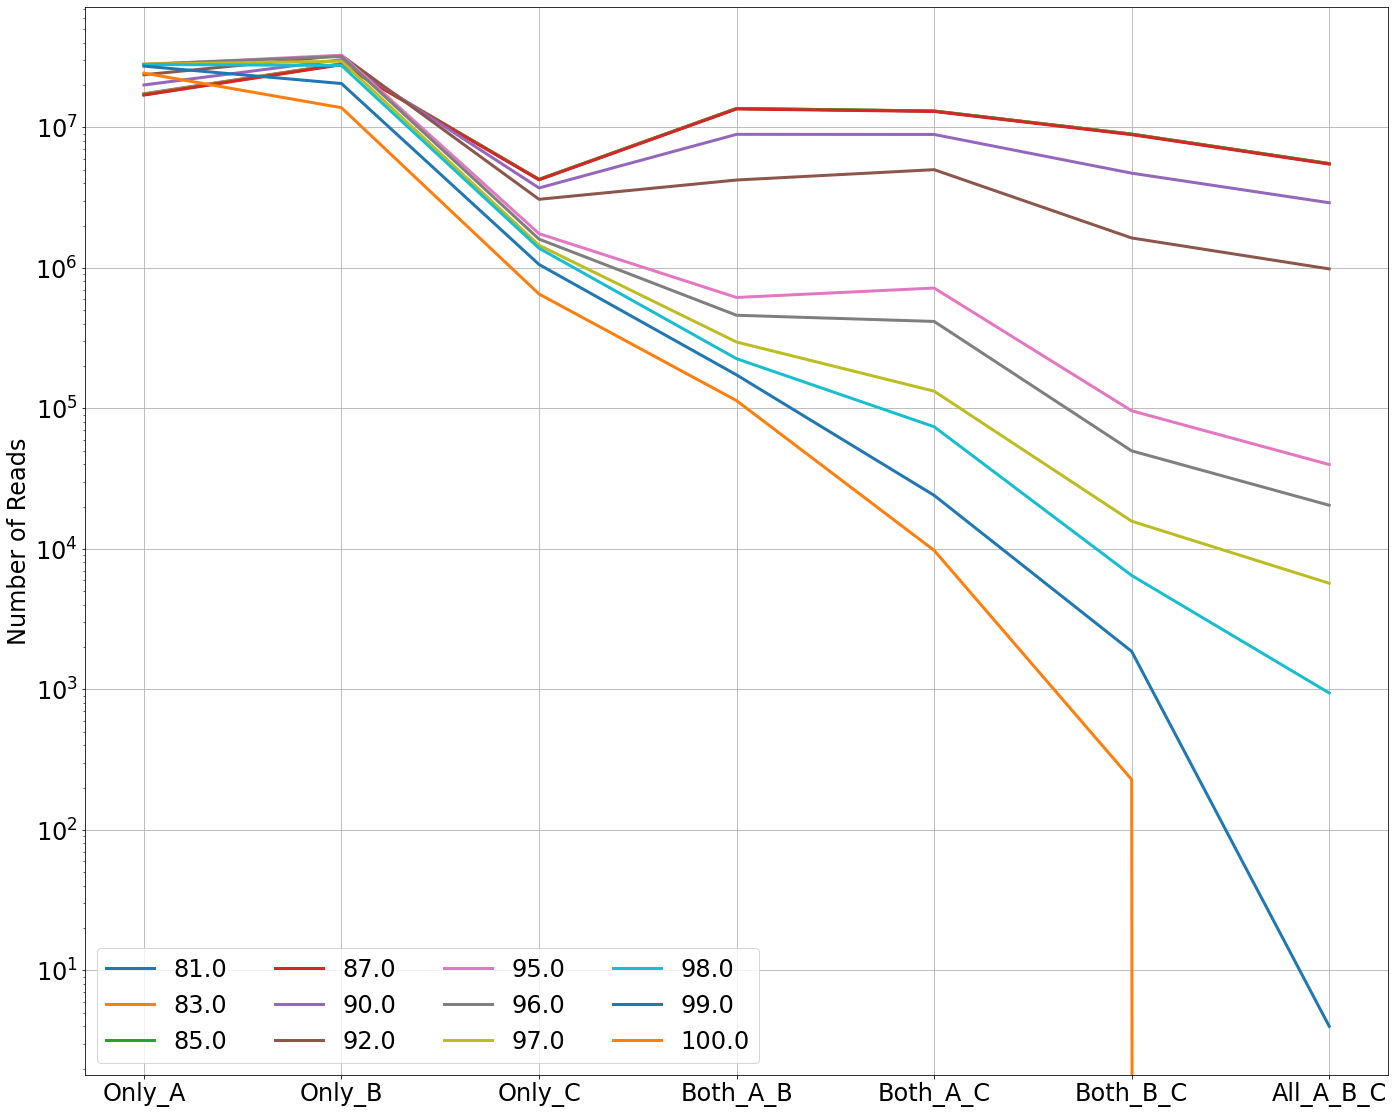

In [19]:
fig,ax = plt.subplots(1,1, figsize = (20,16))
df_all_samples.T.plot(ax = ax, linewidth=3)
ax.legend(ncol=4)
ax.set_ylabel('Number of Reads')
ax.set_yscale('log')
ax.grid()
fig.tight_layout()

fig.savefig(outdir+'Parameterization-All-Samples.pdf')

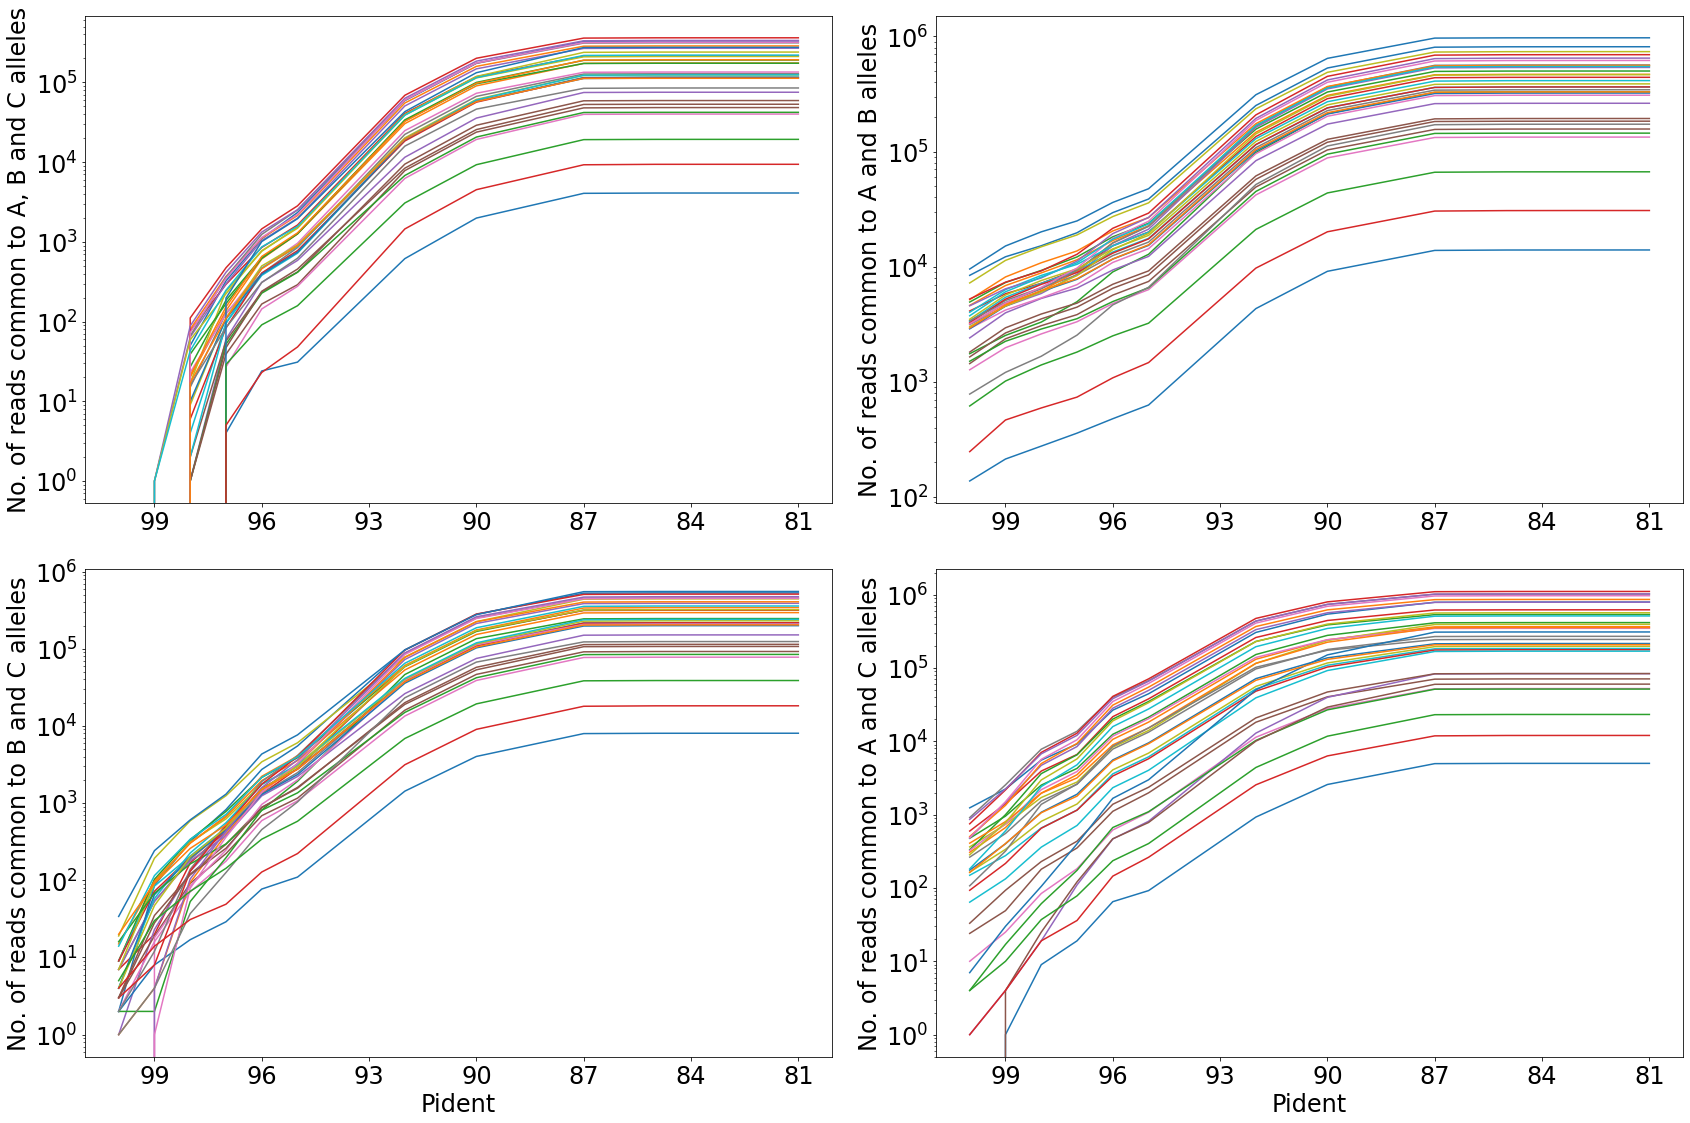

In [20]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
df_all_abc.plot(x = 'Pident', legend = False, ax = ax[0][0])
ax[0][0].set_yscale('log')
ax[0][0].set_xticks(range(81, 101, 3))
ax[0][0].set_xlim(ax[0][0].get_xlim()[::-1])

df_both_ab.plot(x = 'Pident', legend = False, ax = ax[0][1])
ax[0][1].set_yscale('log')
ax[0][1].set_xticks(range(81, 101, 3))
ax[0][1].set_xlim(ax[0][1].get_xlim()[::-1])

df_both_bc.plot(x = 'Pident', legend = False, ax = ax[1][0])
ax[1][0].set_yscale('log')
ax[1][0].set_xticks(range(81, 101, 3))
ax[1][0].set_xlim(ax[1][0].get_xlim()[::-1])

df_both_ac.plot(x = 'Pident', legend = False, ax = ax[1][1])
ax[1][1].set_yscale('log')
ax[1][1].set_xticks(range(81, 101, 3))
ax[1][1].set_xlim(ax[1][1].get_xlim()[::-1])

ax[0][0].set_xlabel('')
ax[0][1].set_xlabel('')

ax[0][0].set_ylabel('No. of reads common to A, B and C alleles')
ax[0][1].set_ylabel('No. of reads common to A and B alleles')
ax[1][0].set_ylabel('No. of reads common to B and C alleles')
ax[1][1].set_ylabel('No. of reads common to A and C alleles')

fig.tight_layout()

fig.savefig(outdir+'Parameterizing_Pidentity_Cutoff.pdf')

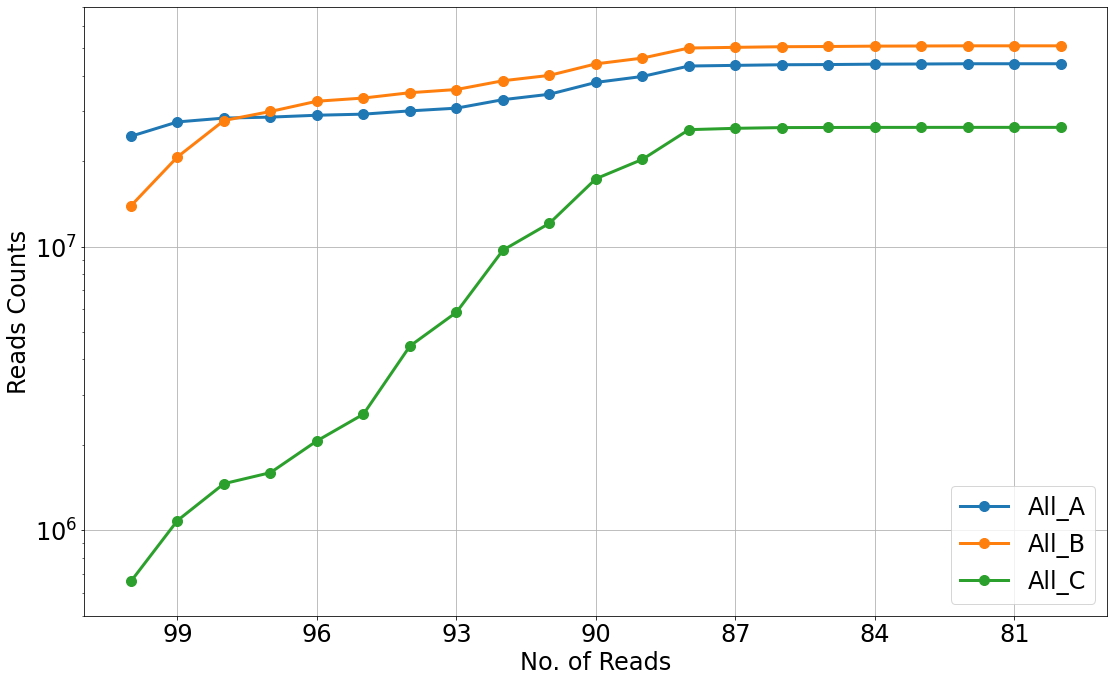

In [39]:
df_all_samples['All_A'] = df_all_samples['Only_A']+df_all_samples['Both_A_B'] + df_all_samples['Both_A_C']
df_all_samples['All_B'] = df_all_samples['Only_B']+df_all_samples['Both_A_B'] + df_all_samples['Both_B_C']
df_all_samples['All_C'] = df_all_samples['Only_C']+df_all_samples['Both_B_C'] + df_all_samples['Both_A_C']

fig,ax = plt.subplots(1,1,figsize = (16,10))
df_all_samples[['All_A','All_B','All_C']].plot(kind = 'line', ax = ax, marker = 'o', linewidth=3, ms = 10)
ax.set_yscale('log')
ax.set_xticks(range(81, 101, 3))
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim([500000, 7*10**7])
ax.grid()
ax.set_xlabel('No. of Reads')
ax.set_ylabel('Reads Counts')
fig.tight_layout()

fig.savefig(outdir+'All_Read_Counts.pdf')

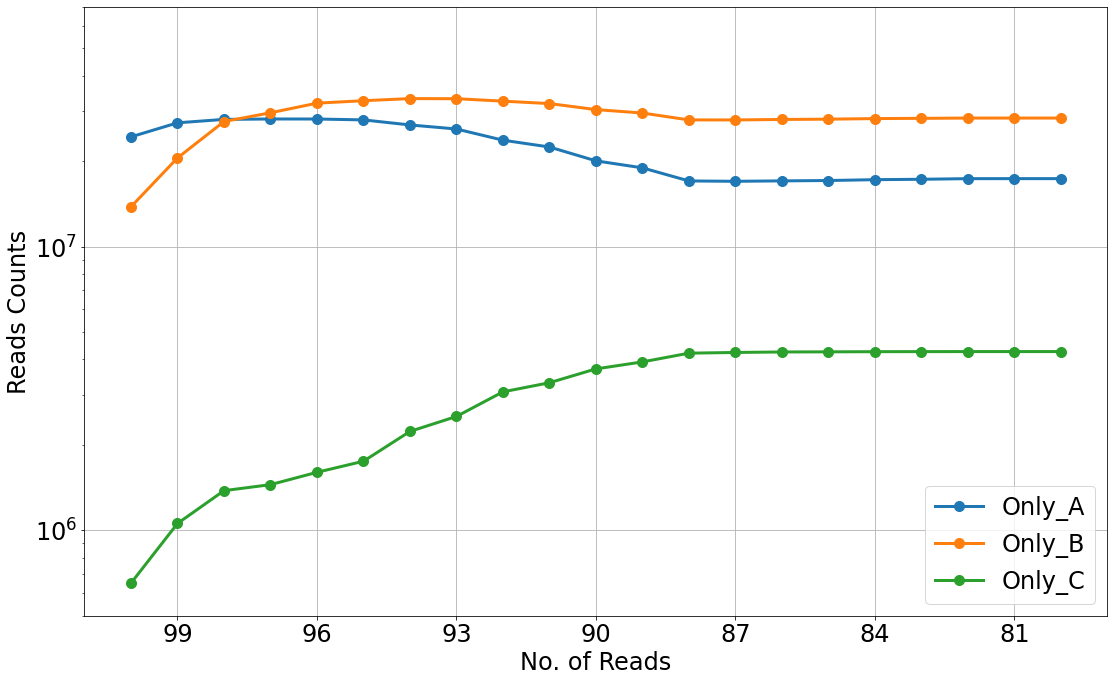

In [40]:
fig,ax = plt.subplots(1,1,figsize = (16,10))
df_all_samples[['Only_A','Only_B','Only_C']].plot(kind = 'line', ax = ax, marker = 'o', linewidth=3, ms = 10)
ax.set_yscale('log')
ax.set_xticks(range(81, 101, 3))
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim([500000, 7*10**7])
ax.grid()
ax.set_xlabel('No. of Reads')
ax.set_ylabel('Reads Counts')
fig.tight_layout()

fig.savefig(outdir+'Only_Read_Counts.pdf')

In [41]:
df_all_samples

,Only_A,Only_B,Only_C,Both_A_B,Both_A_C,Both_B_C,All_A_B_C,All_A,All_B,All_C
Pident,,,,,,,,,,
80.0,17343635.0,28352511.0,4264484.0,13632304.0,13071146.0,8953363.0,5523790.0,44047085.0,50938178.0,26288993.0
81.0,17343441.0,28352369.0,4264478.0,13632301.0,13071143.0,8953362.0,5523790.0,44046885.0,50938032.0,26288983.0
82.0,17341117.0,28350707.0,4264429.0,13632279.0,13071121.0,8953358.0,5523787.0,44044517.0,50936344.0,26288908.0
83.0,17253717.0,28286590.0,4262843.0,13630241.0,13069919.0,8952952.0,5523639.0,43953877.0,50869783.0,26285714.0
84.0,17198113.0,28229055.0,4260776.0,13628446.0,13068801.0,8952250.0,5523374.0,43895360.0,50809751.0,26281827.0
85.0,17079964.0,28096023.0,4255143.0,13617678.0,13062259.0,8947221.0,5520758.0,43759901.0,50660922.0,26264623.0
86.0,17031012.0,28028379.0,4250832.0,13604286.0,13051540.0,8939018.0,5516430.0,43686838.0,50571683.0,26241390.0
87.0,16972458.0,27922916.0,4233892.0,13516721.0,12979634.0,8873003.0,5478335.0,43468813.0,50312640.0,26086529.0
88.0,17022173.0,27928562.0,4209734.0,13368107.0,12850704.0,8744610.0,5401250.0,43240984.0,50041279.0,25805048.0
